In [8]:
from veldis.veldis import Veldis
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sn
from specim.specfuncs import spec1d
import scipy.interpolate as intp

In [2]:
spec = Veldis('../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits', 
              informat='fits', logwav=True, trimsec=[7600, -4300])#[7000, -3500]


Reading spectrum from ../spectra_extraction/J0147_ESI_spectra/spec1d_J0147_coadd2d_moffat_deflector.fits
Expected file format: fits
 Spectrum Start:  6544.12
 Spectrum End:     8556.09
 Dispersion (1st pixel):   0.25
 Dispersion (average):      0.29




Line        lambda_rest  lambda_obs
----------  -----------  -----------
CaII K        3933.67       6600.70
CaII H        3968.47       6659.09
H-delta       4101.00       6881.48
G-band        4305.00       7223.79
H-gamma       4340.00       7282.52
Fe4383        4383.00       7354.67
Ca4455        4455.00       7475.49
Fe4531        4531.00       7603.02
H-beta        4861.00       8156.76



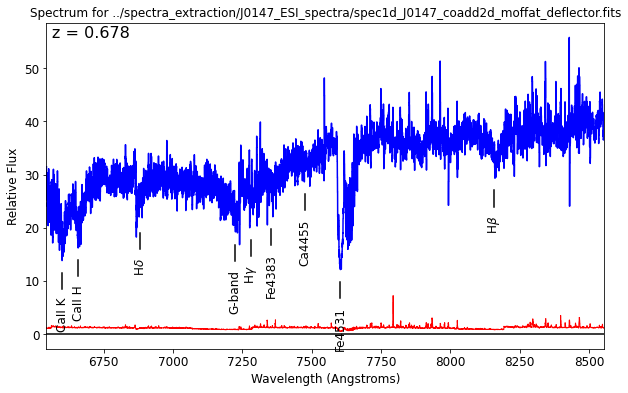

In [3]:
#%matplotlib notebook
fg = plt.figure(figsize=(10,6))
spec.smooth(3, fig=fg)
spec.mark_lines('abs', z=0.678, usesmooth=True)
#spec.mark_lines('em', z=0.678, usesmooth=True)


The wavelength is red shifted.
Externally calculated velocity scale = 11.389911 km/s
velocity scale from ppxf = 11.389931 km/s


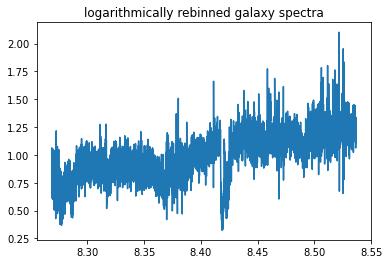

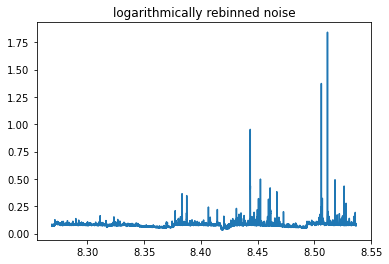

In [4]:
spec.cal_parm(z=0.678, high_z=True, logscale=True, veldis_start=200, noise_scale=0.08)

## As the dispersion of the ESI spectra chages over order, so does the FWHM spectral resolution. As a result, the Gaussian fits to the sky lines shows that the sigma of the instrumets increases over wavelength. So instead of constant 'sig_ins' we should use 'sig_ins' as a function of wavelength.

In [5]:
obs_sig_ins = [0.5258406155833542, 0.5949069093977397, 0.593540042382132, 0.6558044100657164,
               0.6627657453518808, 0.6684210858602885, 0.6651448714381213,0.6647070420360967,
               0.7562566482772943, 0.7560433044568932, 0.7656551609540487,0.7670955808170434,
               0.774703437769885, 0.7705351730103848, 0.8839503527420658, 0.9074551212625619,
               0.8950238681247156, 0.9092347293389573]

In [6]:
obs_wav_range = [(6298.8, 6301.36), (6921.23, 6924.65), (6947.23, 6950.4), (7314.0, 7317.9),
                 (7338.65, 7342.7),
             (7792.2, 7796.0),  (7819.5, 7823.03), (7991.1, 7995.05), (8396.2, 8401.3), (8428.0, 8431.9),
             (8462.85, 8467.15), (8882.7, 8888.0), (8916.7, 8921.9), (8954.9, 8960.4), (9473.7, 9479.0),
             (9564.1, 9569.9), (9868.9, 9874.9),  (9911.5, 9917.4)]
obs_wav = []

for w in obs_wav_range:
    obs_wav.append(np.mean(w))
    
wav_mask = (obs_wav >= spec['wav'][0]) & (obs_wav <= spec['wav'][-1])
obs_wav_vd = obs_wav[wav_mask]
obs_wav_range

In [31]:
sig_ins_fnc = intp.splrep(obs_wav, obs_sig_ins, k=1)
sig_ins_wav = intp.splev(spec['wav'], sig_ins_fnc)
sig_ins_full = intp.splev(np.arange(6300, 10000, 0.25),sig_ins_fnc)

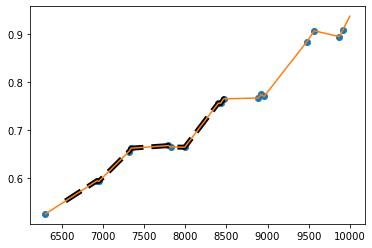

In [32]:
plt.plot(obs_wav, obs_sig_ins, 'o', label='observed')
plt.plot(spec['wav'], sig_ins_wav, '--', label='interpolated', color='k', lw=5)
plt.plot(np.arange(6300, 10000, 0.25), sig_ins_full, label='interpolated_full')

In [38]:
np.array([.55, .75])*2.355/1.678 

array([0.77190107, 1.05259237])